In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn

In [97]:
data = pd.read_csv('Churn_Modelling.csv')

In [98]:
data.shape

(10000, 14)

In [99]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [101]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [102]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [103]:
data.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [104]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

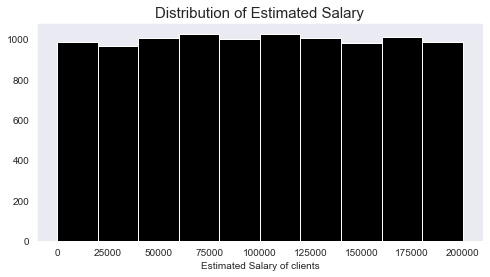

In [105]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(data['EstimatedSalary'], color = 'black')
plt.title('Distribution of Estimated Salary', fontsize = 15)
plt.xlabel('Estimated Salary of clients')
plt.grid()
plt.show()

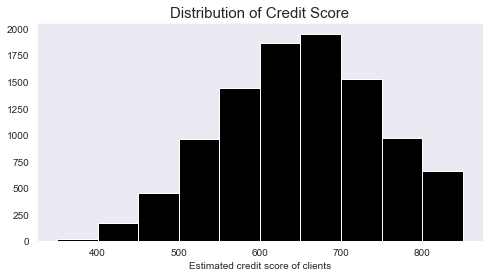

In [106]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(data['CreditScore'], color = 'black')
plt.title('Distribution of Credit Score', fontsize = 15)
plt.xlabel('Estimated credit score of clients')
plt.grid()
plt.show()

<Figure size 1080x216 with 0 Axes>

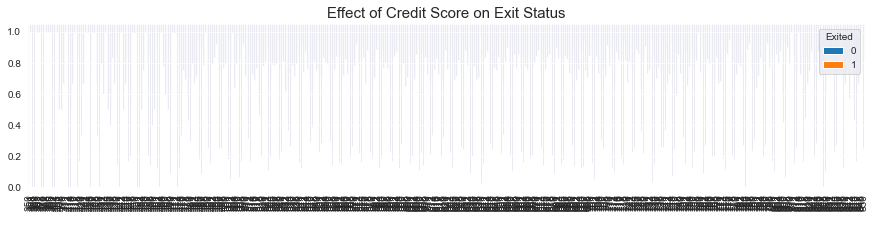

In [107]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
plt.figure(facecolor='black') 
x = pd.crosstab(data['CreditScore'], data ['Exited'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Credit Score on Exit Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

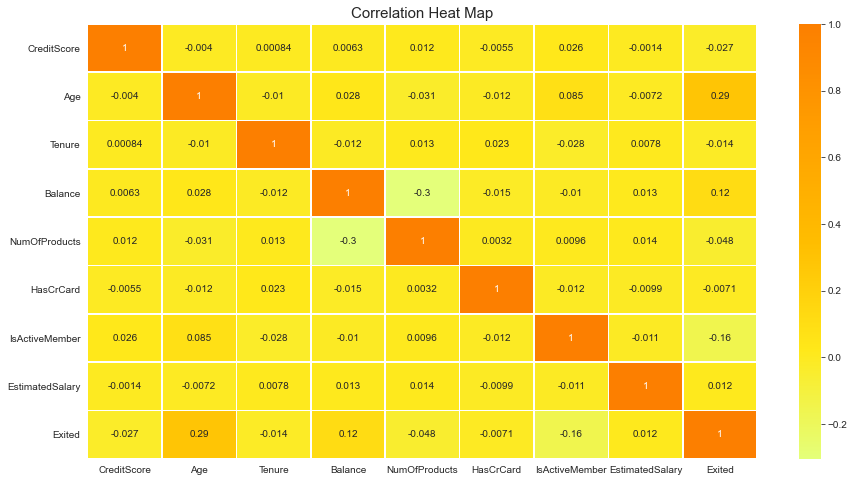

In [108]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.set_style("darkgrid")
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [109]:
data['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [110]:
data['Geography'] = data['Geography'].replace(("France", "Germany", "Spain"),
                                                (3, 2, 1))
data['Gender'] = data['Gender'].replace(("Male", "Female"),
                                                (1, 0))


In [111]:
y = data['Exited']
x = data.drop(['Exited'], axis = 1)

In [112]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
ros.fit(x, y)
x_resample, y_resample  = ros.fit_resample(x, y)

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(15926, 10)
(15926,)


In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)


In [143]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)
print("Training Accuracy :", model1.score(x_train, y_train))
print("Testing Accuracy :", model1.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9102322661644695


In [179]:
from sklearn.ensemble import BaggingClassifier

model4 = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=134, 
max_samples=0.8, 
bootstrap=True,
oob_score=False,
random_state=0
)

In [180]:
model4.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=134, random_state=0)

In [181]:
y_pred4 = model4.predict(x_test)
print("Training Accuracy :", model4.score(x_train, y_train))
print("Testing Accuracy :", model4.score(x_test, y_test))

Training Accuracy : 0.999607535321821
Testing Accuracy : 0.9403640929064658


In [164]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 72, min_samples_leaf = 1, max_features = 'auto', class_weight = {0:1, 1:4})
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)
print("Training Accuracy :", model2.score(x_train, y_train))
print("Testing Accuracy :", model2.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9544883866917765


In [157]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2]
min_samples_split = [2, 5]
bootstrap = [True, False]

In [158]:
param_grid = {'n_estimators':n_estimators, 
              'max_features':max_features, 
              'min_samples_leaf':min_samples_leaf
              
              }

In [159]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = param_grid, cv = 2, verbose = 2, n_jobs = 4)

In [160]:
rf_grid.fit(x_train, y_train)
rf_grid.best_params_

Fitting 2 folds for each of 40 candidates, totalling 80 fits


{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 72}

In [165]:

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10) ]
max_samples = [0.5, 0.8]
bootstrap = [True, False]
oob_score = [True, False]

In [166]:
ram_grid = {'n_estimators': n_estimators,
            'bootstrap':bootstrap,
            'oob_score':oob_score
           }

In [167]:
bagging_grid = GridSearchCV(estimator = BaggingClassifier(), param_grid = ram_grid, cv = 2, verbose = 2, n_jobs = 4)

In [168]:
bagging_grid.fit(x_train, y_train)
bagging_grid.best_params_

Fitting 2 folds for each of 40 candidates, totalling 80 fits


{'bootstrap': True, 'n_estimators': 134, 'oob_score': False}

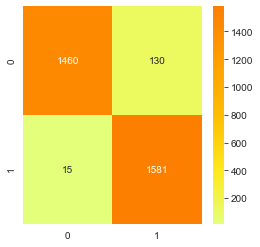

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1590
           1       0.92      0.99      0.96      1596

    accuracy                           0.95      3186
   macro avg       0.96      0.95      0.95      3186
weighted avg       0.96      0.95      0.95      3186

0.9561536135470214
0.9544883866917765
0.9240210403272939
0.9906015037593985


In [186]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred2)
plt.rcParams['figure.figsize'] = (4,4)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred2)
print(cr)

score = f1_score(y_test, y_pred2)
print(score)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)
precision = precision_score(y_test, y_pred2)
print(precision)
recall = recall_score(y_test, y_pred2)
print(recall)

In [ ]:
#99.06% recall, 0.96 f1 score, 95.63% accuracy for Random Forest
#98.62% recall, 0.92 f1 score, 91% accuracy for decision tree
#98.93% recall, 0.954 f1 score, 95.26% accuracy for bagging model